In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

VTKHDF/CellData/phi (61, 61)
VTKHDF/FieldData/X (3721,)
VTKHDF/FieldData/Y (3721,)
VTKHDF/FieldData/iter (1,)


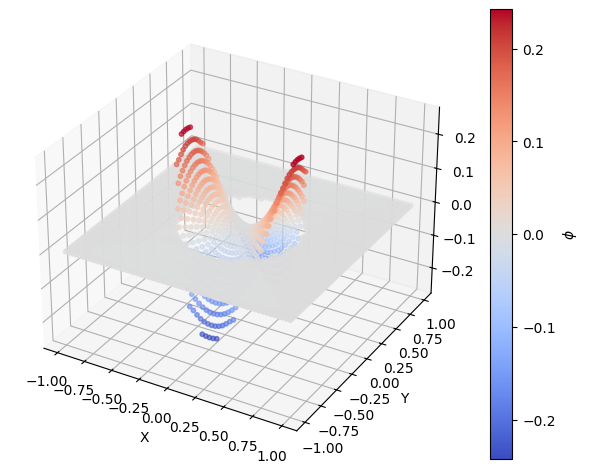

In [ ]:
# file = "data_example3.hdf"
# file = "data_example5.hdf"
file = "data_example7.hdf"

with h5py.File(file, "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
    niter = f["VTKHDF/FieldData/iter"][0]
    X = f["VTKHDF/FieldData/X"][:].reshape(phi.shape)
    Y = f["VTKHDF/FieldData/Y"][:].reshape(phi.shape)
    f.visititems(
        lambda name, obj: (
            print(name, obj.shape) if isinstance(obj, h5py.Dataset) else None
        )
    )
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
scatter = ax.scatter(X, Y, phi, c=phi, cmap="coolwarm", s=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.colorbar(scatter, ax=ax, label="$\\phi$")
plt.tight_layout()

Text(0.5, 1.0, 'data_example7.hdf, niter=[114]')

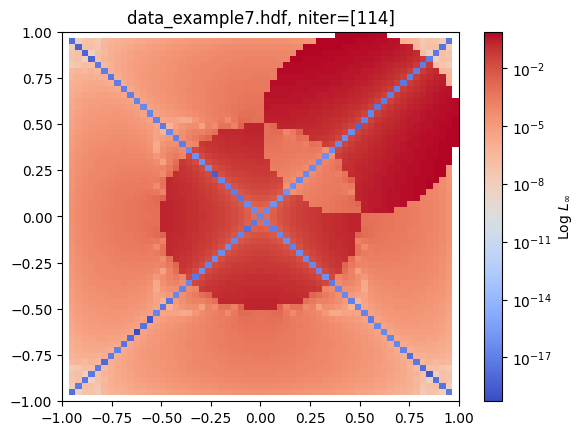

In [7]:
if file == "data_example3.hdf":
    u = np.exp(-(X**2) - Y**2)
    u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.25**2] = 0
if file == "data_example5.hdf":
    u = 1 + np.log(2 * np.sqrt(X**2 + Y**2))
    u[X**2 + Y**2 < 0.5**2] = 1
if file == "data_example7.hdf":
    u = X**2 - Y**2
    u[(X - 0.5) ** 2 + (Y - 0.5) ** 2 > 0.5**2] = 0

plt.pcolormesh(
    X, Y, np.abs(u - phi), cmap="coolwarm", norm=plt.matplotlib.colors.LogNorm()
)
plt.colorbar(label="Log $L_\\infty$")
plt.title(f"{file}, niter={niter}")

Text(0, 0.5, '$\\phi$')

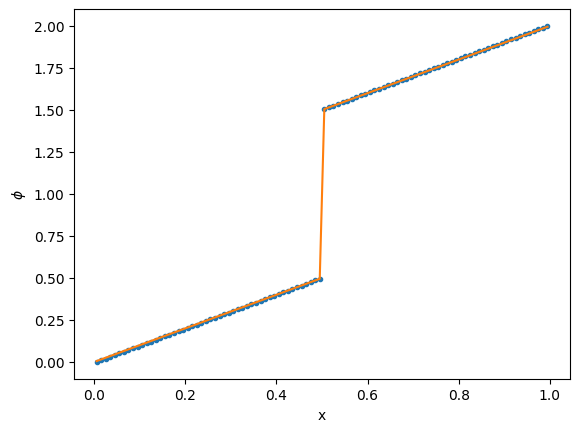

In [ ]:
file = "data_example1.hdf"
# file = "data_example2.hdf"
with h5py.File(file, "r") as f:
    phi = f["VTKHDF/CellData/phi"][:]
    x = f["VTKHDF/FieldData/X"][:].reshape(phi.shape)
    # f.visititems(
    #     lambda name, obj: (
    #         print(name, obj.shape) if isinstance(obj, h5py.Dataset) else None
    #     )
    # )

x = x[-1]
phi = phi[-1]
if file == "data_example1.hdf":
    u = np.piecewise(x, [x <= 0.5, x > 0.5], [lambda x: x, lambda x: x + 1])
if file == "data_example2.hdf":
    u = np.piecewise(x, [(0.3 <= x) & (x <= 0.6)], [lambda x: np.exp(-(x**2)), 0])
plt.plot(x, phi, ".")
plt.plot(x, u)
plt.xlabel("x")
plt.ylabel("$\\phi$")